In [3]:
from pysal.lib import weights
from matplotlib import pyplot as plt

import pandas as pd
import geopandas as gpd
import folium
import segregation as seg

import sys
import os

os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd

sys.path.insert(0, "../src")

from landprice_merger import (
    zensus_landprice_merger,
    landprice_neighborhood_merger,
    combine_landprice_with_geodata,
)
from csv_merger import combine_csvs
from principal_component_analysis import combine_PCA_datasets


In [4]:
cities = ["Berlin", "Bremen", "Dresden", "Frankfurt_am_Main", "Köln"]

main_path = os.path.join(os.getcwd(), "..")

path_zensus = os.path.join(main_path, "res", "data", "DLR", "2 Zensus")
path_land = os.path.join(main_path, "res", "data", "DLR", "1 Land Prices")
path_neigh = os.path.join(main_path, "res", "data", "DLR", "3 Neighborhoods")


In [5]:
df_zensus = combine_csvs(str_path=path_zensus)

gdf_zensus = combine_PCA_datasets(
    df_zensus=df_zensus, str_city=cities[0], str_path=path_zensus
)


In [6]:
df_land_prices = combine_csvs(str_path=path_land)

gdf_landprices = combine_landprice_with_geodata(
    df_landprice=df_land_prices, str_city=cities[0], str_path=path_land
)

gdf_landprices_names = landprice_neighborhood_merger(
    gdf_landprice=gdf_landprices, str_city=cities[0], str_path_neigh=path_neigh
)


In [7]:
result = zensus_landprice_merger(
    gdf_landprices=gdf_landprices_names, gdf_zensus=gdf_zensus
)


In [99]:
result.shape


(96838, 90)

In [73]:
out_path = "../res/data/Berlin_streamlit.csv"
result.to_csv(out_path)


In [96]:
result.r_7_and_more.describe()


count    96838.000000
mean         0.414218
std          1.291762
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         29.000000
Name: r_7_and_more, dtype: float64

In [21]:
result.columns


Index(['Grid_Code', 'City_Code', 'geometry', 'families_total_units',
       'famk_couple_children_more_18', 'famk_reg_partner_wout_child',
       'famk_reg_partner_1_child_less_18', 'famk_reg_partner_children_more_18',
       'famk_nonmarital_wout_child', 'famk_nonmarital_children_more_18',
       'famk_fathers_1_child_less_18', 'famk_fathers_children_more_18',
       'famk_mothers_children_more_18', 'famgr_5_pers', 'famgr_6_more', 'City',
       'population_total_units', 'al_80_over', 'fam_civil_partner_deceased',
       'fam_civil_partner_dissolved', 'fam_unknown', 'geb_other', 'sh_bosnia',
       'sh_greece', 'sh_italy', 'sh_kazakhstan', 'sh_croatia',
       'sh_netherlands', 'sh_poland', 'sh_romania', 'sh_russia', 'sh_ukraine',
       'sz_mult_foreign_only', 'sz_unknown', 'buildings_total_units',
       'n_owned_without_current_household',
       'n_rented_without_current_household', 'n_vacant',
       'we_private_individuals', 'we_private_companies_legal_entities',
       'we_publ

In [100]:
artificial = result.copy()
artificial = artificial[
    [
        "Grid_Code",
        "City_Code",
        "geometry",
        "families_total_units",
        "we_housing_cooperative",
        "population_total_units",
        "buildings_total_units",
        "Land_Value",
        "City_Name",
        "CommercialBuildingArea",
        "MixedUseArea",
        "Residential",
        "SpecialUseArea",
        "Neighborhood_Name",
    ]
]


In [101]:
artificial.head()


,Grid_Code,City_Code,geometry,families_total_units,we_housing_cooperative,population_total_units,buildings_total_units,Land_Value,City_Name,CommercialBuildingArea,MixedUseArea,Residential,SpecialUseArea,Neighborhood_Name
0,100mN32539E45693,11000000,"POLYGON ((4569300.000 3253900.000, 4569300.000...",0.0,0.0,0.0,0.0,469.8,Berlin,0,0,1,0,Schmöckwitz
1,100mN32539E45694,11000000,"POLYGON ((4569400.000 3253900.000, 4569400.000...",0.0,0.0,0.0,0.0,469.8,Berlin,0,0,1,0,Schmöckwitz
2,100mN32539E45695,11000000,"POLYGON ((4569500.000 3253900.000, 4569500.000...",0.0,0.0,0.0,0.0,469.8,Berlin,0,0,1,0,Schmöckwitz
3,100mN32539E45696,11000000,"POLYGON ((4569600.000 3253900.000, 4569600.000...",0.0,0.0,0.0,0.0,469.8,Berlin,0,0,1,0,Schmöckwitz
4,100mN32540E45692,11000000,"POLYGON ((4569200.000 3254000.000, 4569200.000...",0.0,0.0,0.0,0.0,469.8,Berlin,0,0,1,0,Schmöckwitz


In [102]:
artificial.Neighborhood_Name.describe()


count        96838
unique          96
top       Köpenick
freq          3693
Name: Neighborhood_Name, dtype: object

<Axes: >

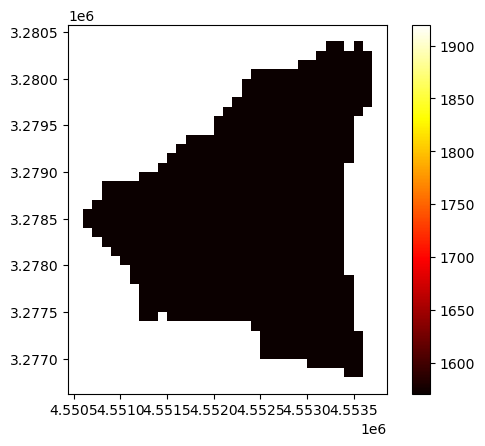

In [111]:
result[result.Neighborhood_Name == "Pankow"].plot(
    column="Land_Value", cmap="hot", legend=True
)
